In [1]:
import sys
sys.path.append('../')

%reload_ext autoreload
%autoreload 2

import Utility as ut
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import pandas as pd
import numpy as np
import sklearn
import scipy

from matplotlib.lines import Line2D

from collections import Counter

np.random.seed(0)

In [70]:
cycleZ = pd.read_csv("../Data/Chickens data/WithMacro/CycleZ-Clean.csv")
cycleA = pd.read_csv("../Data/Chickens data/WithMacro/CycleA-Clean.csv")
cycleB = pd.read_csv("../Data/Chickens data/WithMacro/CycleB-Clean.csv")

In [73]:
cycleZ=cycleZ.rename(columns={"Date of Laid": "Date"})
cycleZ.Date = pd.to_datetime(cycleZ.Date, format = '%m/%d/%Y')
cycleA=cycleA.rename(columns={"Date of Laid": "Date"})
cycleA.Date = pd.to_datetime(cycleA.Date, format = '%m/%d/%Y')
cycleB=cycleB.rename(columns={"Date of Laid": "Date"})
cycleB.Date = pd.to_datetime(cycleB.Date, format = '%m/%d/%Y')

cycleZ=cycleZ.rename(columns={"Laied": "Laid"})
cycleA=cycleA.rename(columns={"Laied": "Laid"})
cycleB=cycleB.rename(columns={"Laied": "Laid"})

In [4]:
def compareDifferentCycles(dataSets, attribute):
    '''
    Function to compare two cycles attributes or more
    '''
    
    fig, ax = plt.subplots()
    ax.set_xlabel('Period')
    ax.set_ylabel(attribute)
    #Select to plot just years
    # ax.xaxis.set_major_locator(mpl.dates.DayLocator((1, 15)))
    # ax.xaxis.set_minor_locator(mpl.dates.MonthLocator((1,4,7,10)))
    # ax.xaxis.set_major_formatter(mpl.dates.DateFormatter("\n%d"))
    # ax.xaxis.set_minor_formatter(mpl.dates.DateFormatter("%b"))
    fig.set_figwidth(20)
    
    legend = ['Z', 'A', 'B']
    
    # apply min-max normalization
    # scaler = MinMaxScaler()
    # dataSets = pd.DataFrame(scaler.fit_transform(dataSets.values), columns=dataSets.columns, index=dataSets.index)
    
    for idx, dataSet in enumerate(dataSets):
        # remove columns with informations that could not be plot
        dataSet = dataSet.drop(columns=["Arrival Chickens Date","Date of Selling"])
        # choose only the enteresting attribute
        dataSet = dataSet[attribute]
        
        window = 14
        avarageData = []
        nparray = np.array(dataSet)
        for i in range(len(nparray) - window + 1):
            avarageData.append(np.mean(nparray[i:i+window]))
        dataSet = avarageData
        ax.plot(dataSet, label=legend[idx])
        
    
    plt.setp(ax.get_xticklabels(), rotation=0, ha="center")
    plt.legend(legend)
    # plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    # plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=31))

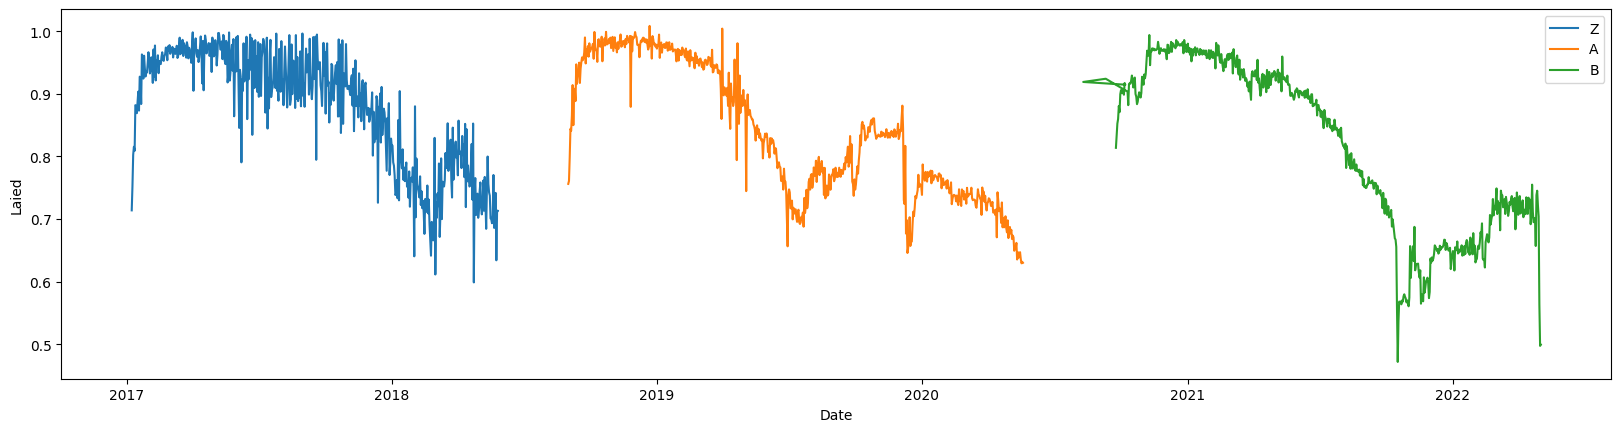

In [5]:
fig, ax1 = plt.subplots()
plt.ylabel("Laied")
plt.xlabel("Date")
fig.set_figwidth(20)
ax1.plot(cycleZ.Date, cycleZ["Laied"], label='Z')
ax1.plot(cycleA.Date, cycleA["Laied"], label='A')
ax1.plot(cycleB.Date, cycleB["Laied"], label='B')
ax1.legend()
plt.show()

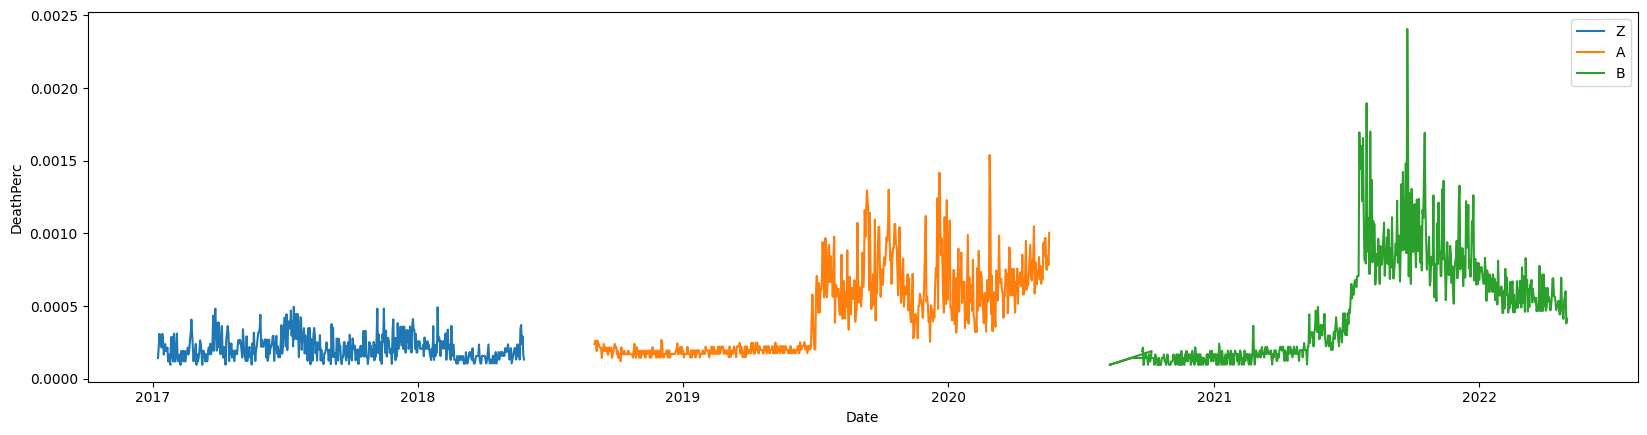

In [6]:
fig, ax1 = plt.subplots()
plt.ylabel("DeathPerc")
plt.xlabel("Date")
fig.set_figwidth(20)
ax1.plot(cycleZ.Date, cycleZ["DeathPerc"], label='Z')
ax1.plot(cycleA.Date, cycleA["DeathPerc"], label='A')
ax1.plot(cycleB.Date, cycleB["DeathPerc"], label='B')
ax1.legend()
plt.show()

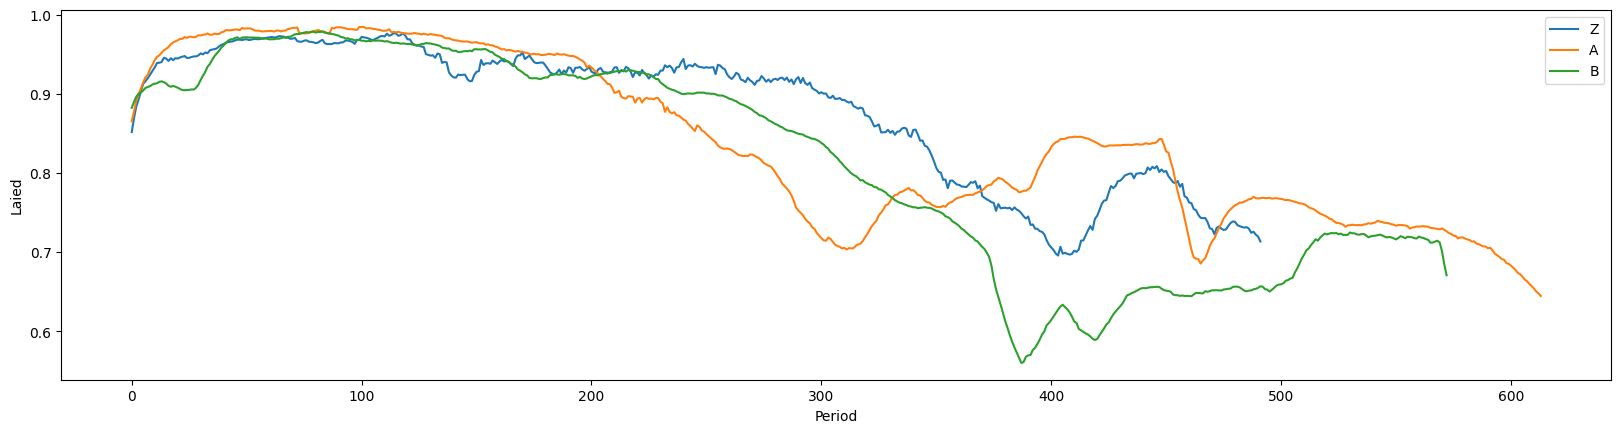

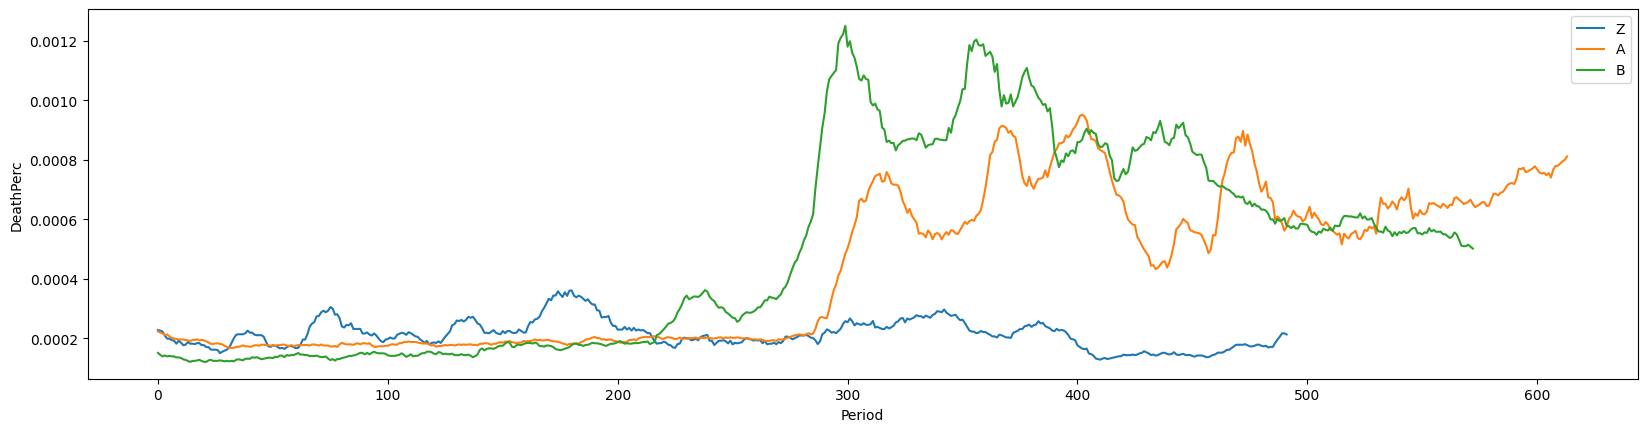

In [18]:
compareDifferentCycles([cycleZ, cycleA, cycleB], "Laied")
compareDifferentCycles([cycleZ, cycleA, cycleB], "DeathPerc")

In [5]:
cycleTot = pd.concat([cycleZ,cycleA,cycleB])

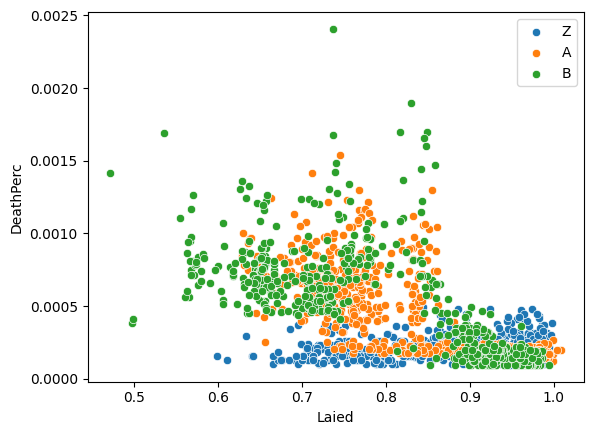

In [23]:
sns.scatterplot(data = cycleZ, x = cycleZ["Laied"], y= cycleZ["DeathPerc"], label="Z")
sns.scatterplot(data = cycleA, x = cycleA["Laied"], y= cycleA["DeathPerc"], label="A")
sns.scatterplot(data = cycleB, x = cycleB["Laied"], y= cycleB["DeathPerc"], label="B")
plt.legend()

In [6]:
cycleTot=cycleTot.rename(columns={"Date" : "Date of Laid"})

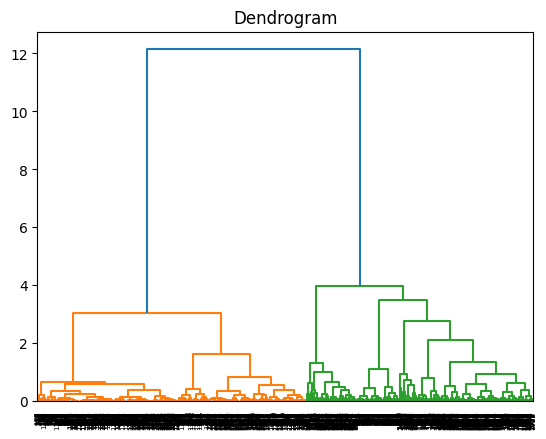

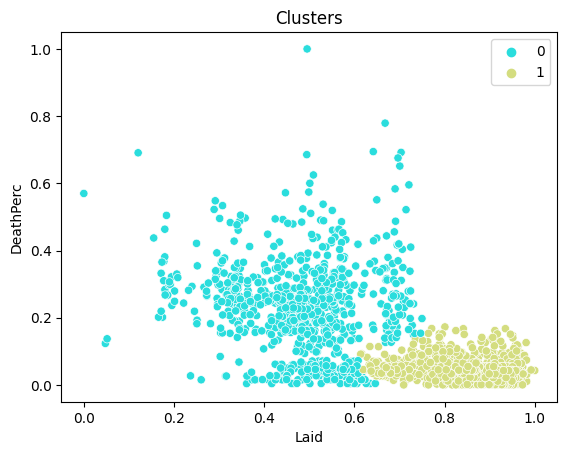

In [29]:
label1 = ut.HierarchicalClutering(cycleTot, ["Laid", "DeathPerc"])

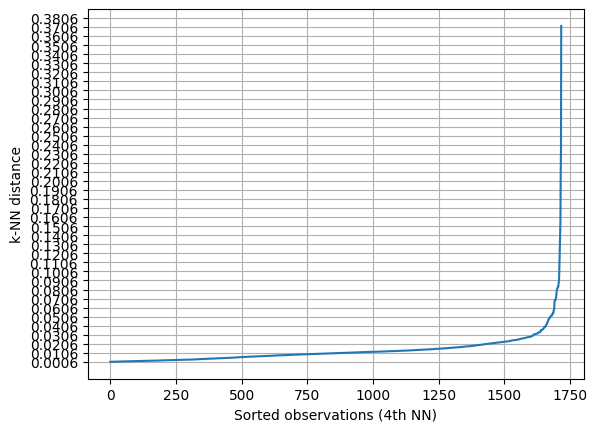

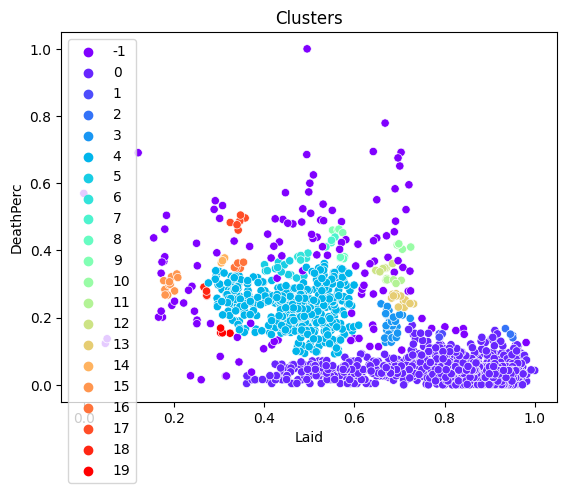

In [34]:
label = ut.DensityClustering(cycleTot, ["Laid", "DeathPerc"])

In [38]:
Counter(label)

Counter({0: 1064,
         2: 4,
         -1: 139,
         1: 4,
         3: 34,
         4: 389,
         5: 14,
         6: 5,
         7: 4,
         9: 4,
         8: 4,
         12: 6,
         10: 5,
         11: 6,
         13: 13,
         19: 4,
         17: 6,
         14: 4,
         18: 4,
         16: 5})

In [48]:
for i in range(len(label)):
    if label[i] == 2:
        label[i] = 0

<AxesSubplot:xlabel='Laid', ylabel='DeathPerc'>

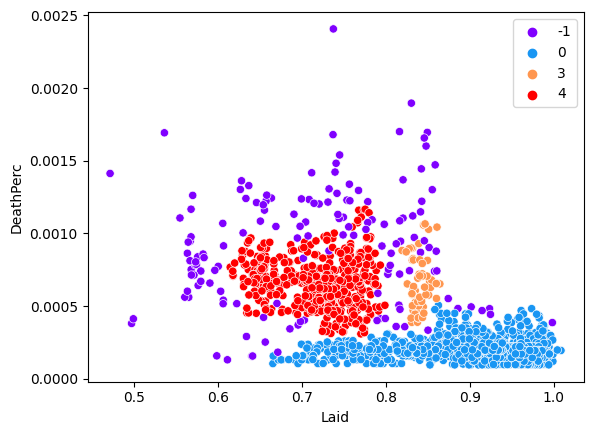

In [49]:
sns.scatterplot(x="Laid", y="DeathPerc",data=cycleTot, hue=label,legend="full", palette="rainbow")

In [50]:
Counter(label)

Counter({0: 1072, -1: 145, 3: 64, 4: 437})

In [51]:
label_cycleZ = label[:505]
label_cycleA = label[505:1132]
label_cycleB = label[1132:1718]

In [52]:
label_group = Counter(label)

In [53]:
cmap = mpl.colormaps['rainbow']
keys = list(label_group.keys())

colors = []

num = len(label_group.keys())+1
step = 1.0/num

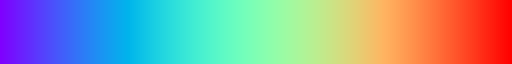

In [101]:
cmap

In [100]:
step

0.2

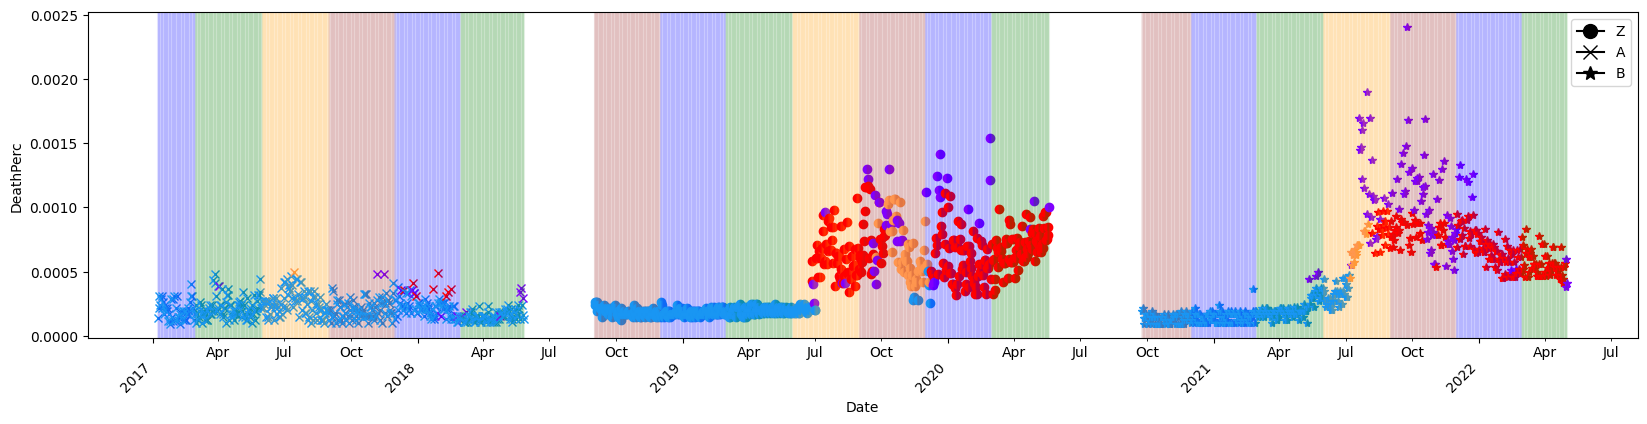

In [67]:
variable = "DeathPerc"

fig, ax1 = plt.subplots()
ax1.set_xlabel('Date')
ax1.set_ylabel("DeathPerc")

ax1.xaxis.set_major_locator(mpl.dates.YearLocator())
ax1.xaxis.set_minor_locator(mpl.dates.MonthLocator((1,4,7,10)))
ax1.xaxis.set_major_formatter(mpl.dates.DateFormatter("\n%Y"))
ax1.xaxis.set_minor_formatter(mpl.dates.DateFormatter("%b"))
fig.set_figwidth(20)
plt.setp(ax1.get_xticklabels(), rotation=0, ha="center")

for i in range(len(label_cycleZ)):

    if label_cycleZ[i] == -1:
        color = cmap.get_under()
    elif label_cycleZ[i] == 4:
        color = cmap.get_over()
    elif label_cycleZ[i] == 0:
        color = cmap(0.2)
    else:
        color = cmap(0.8)
    
    ax1.plot(cycleZ["Date"][i],cycleZ[variable][i],"x", color=color)

    month =  cycleZ.Date.dt.month[i]
    if (month==9)|(month==10)|(month==11):
        color='brown'
    elif (month==12)|(month==1)|(month==2):
        color = 'blue'
    elif (month==3)|(month==4)|(month==5):
        color = 'green'
    elif (month==6)|(month==7)|(month==8):
        color = 'orange'
    ax1.axvline(cycleZ["Date"][i], color=color,alpha=0.1)

for i in range(len(label_cycleA)):

    if label_cycleA[i] == -1:
        color = cmap.get_under()
    elif label_cycleA[i] == 4:
        color = cmap.get_over()
    elif label_cycleA[i] == 0:
        color = cmap(0.2)
    else:
        color = cmap(0.8)
    
    ax1.plot(cycleA["Date"][i],cycleA[variable][i],"o", color=color)

    month =  cycleA.Date.dt.month[i]
    if (month==9)|(month==10)|(month==11):
        color='brown'
    elif (month==12)|(month==1)|(month==2):
        color = 'blue'
    elif (month==3)|(month==4)|(month==5):
        color = 'green'
    elif (month==6)|(month==7)|(month==8):
        color = 'orange'
    ax1.axvline(cycleA["Date"][i], color=color,alpha=0.1)

for i in range(len(label_cycleB)):

    if label_cycleB[i] == -1:
        color = cmap.get_under()
    elif label_cycleB[i] == 4:
        color = cmap.get_over()
    elif label_cycleB[i] == 0:
        color = cmap(0.2)
    else:
        color = cmap(0.8)
    
    ax1.plot(cycleB["Date"][i],cycleB[variable][i],"*", color=color)

    month =  cycleB.Date.dt.month[i]
    if (month==9)|(month==10)|(month==11):
        color='brown'
    elif (month==12)|(month==1)|(month==2):
        color = 'blue'
    elif (month==3)|(month==4)|(month==5):
        color = 'green'
    elif (month==6)|(month==7)|(month==8):
        color = 'orange'
    ax1.axvline(cycleB["Date"][i], color=color,alpha=0.1)

legend_elements = [Line2D([0], [0], marker='o', color='black', label='Z', markersize=10),
                Line2D([0], [0], marker='x', color='black', label='A', markersize=10),
                Line2D([0], [0], marker='*', color='black', label='B', markersize=10),]

ax1.legend(handles=legend_elements, loc='best')

plt.gcf().autofmt_xdate()
plt.xticks(rotation=45)
plt.show()

In [61]:
import numpy as np
import matplotlib.pyplot as plt
# from sklearn.preprocessing import MinMaxScaler
# import matplotlib.dates as mdates
# import matplotlib.ticker as mticker
# import matplotlib as mpl


def compareDifferentCycles(dataSets, attribute):
    '''
    Function to compare two cycles attributes or more
    '''
    
    fig, ax = plt.subplots()
    ax.set_xlabel('Period')
    ax.set_ylabel(attribute)
    #Select to plot just years
    # ax.xaxis.set_major_locator(mpl.dates.DayLocator((1, 15)))
    # ax.xaxis.set_minor_locator(mpl.dates.MonthLocator((1,4,7,10)))
    # ax.xaxis.set_major_formatter(mpl.dates.DateFormatter("\n%d"))
    # ax.xaxis.set_minor_formatter(mpl.dates.DateFormatter("%b"))
    fig.set_figwidth(20)
    
    legend = ['Z', 'A', 'B']
    
    # apply min-max normalization
    # scaler = MinMaxScaler()
    # dataSets = pd.DataFrame(scaler.fit_transform(dataSets.values), columns=dataSets.columns, index=dataSets.index)
    
    for idx, dataSet in enumerate(dataSets):
        # remove columns with informations that could not be plot
        # choose only the enteresting attribute
        dataSet = dataSet[attribute]
        
        window = 30
        avarageData = []
        nparray = np.array(dataSet)
        for i in range(len(nparray) - window + 1):
            avarageData.append(np.mean(nparray[i:i+window]))
        dataSet = avarageData
        ax.plot(dataSet, label=legend[idx])
        
    
    plt.setp(ax.get_xticklabels(), rotation=0, ha="center")
    plt.legend(legend)
    # plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    # plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=31))

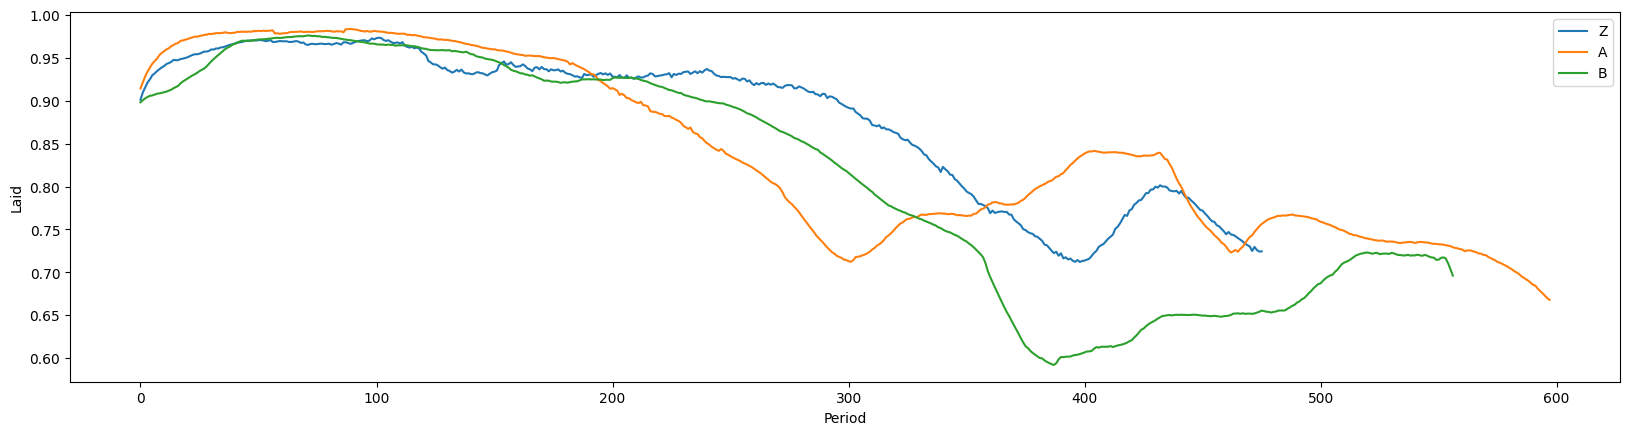

In [86]:
compareDifferentCycles([cycleZ,cycleA,cycleB], "Laid")

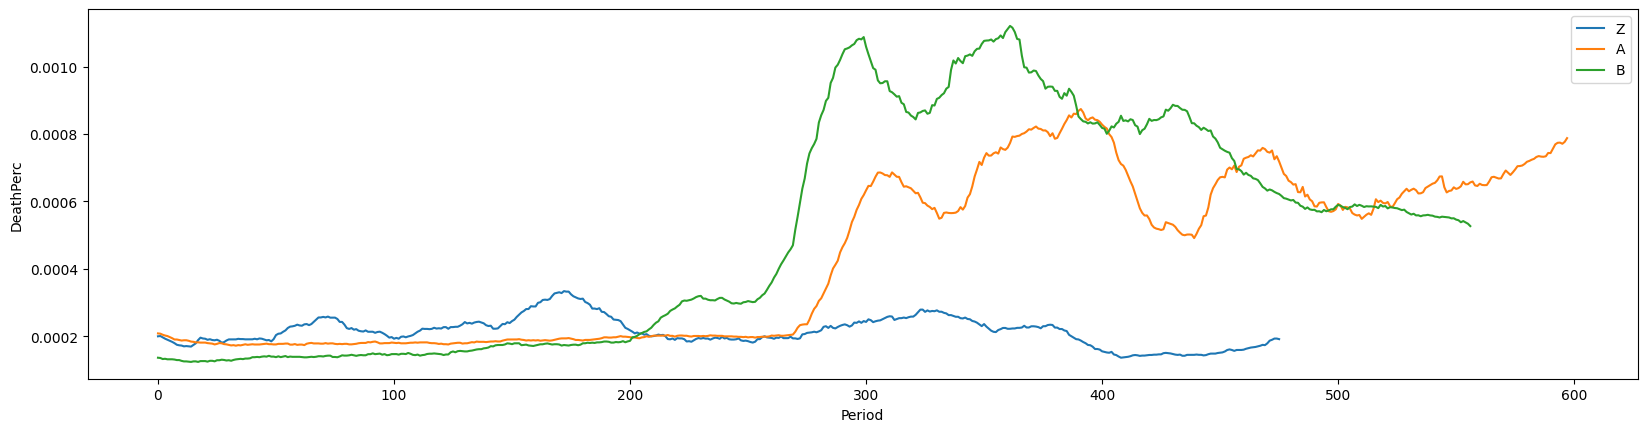

In [62]:
compareDifferentCycles([cycleZ,cycleA,cycleB], "DeathPerc")

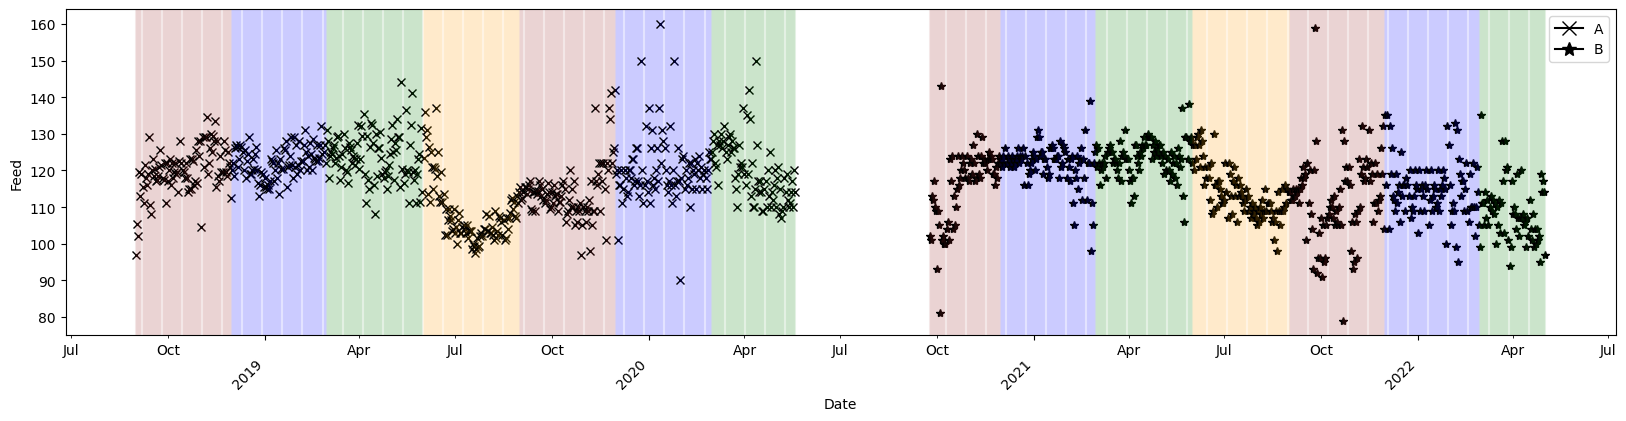

In [79]:
variable = "Feed"

fig, ax1 = plt.subplots()
ax1.set_xlabel('Date')
ax1.set_ylabel("Feed")

ax1.xaxis.set_major_locator(mpl.dates.YearLocator())
ax1.xaxis.set_minor_locator(mpl.dates.MonthLocator((1,4,7,10)))
ax1.xaxis.set_major_formatter(mpl.dates.DateFormatter("\n%Y"))
ax1.xaxis.set_minor_formatter(mpl.dates.DateFormatter("%b"))
fig.set_figwidth(20)
plt.setp(ax1.get_xticklabels(), rotation=0, ha="center")

for i in range(len(cycleA)):
    
    ax1.plot(cycleA["Date"][i],cycleA[variable][i],"x",color="black")

    month =  cycleA.Date.dt.month[i]
    if (month==9)|(month==10)|(month==11):
        color='brown'
    elif (month==12)|(month==1)|(month==2):
        color = 'blue'
    elif (month==3)|(month==4)|(month==5):
        color = 'green'
    elif (month==6)|(month==7)|(month==8):
        color = 'orange'
    ax1.axvline(cycleA["Date"][i], color=color,alpha=0.1)

for i in range(len(cycleB)):

    ax1.plot(cycleB["Date"][i],cycleB[variable][i],"*",color="black")

    month =  cycleB.Date.dt.month[i]
    if (month==9)|(month==10)|(month==11):
        color='brown'
    elif (month==12)|(month==1)|(month==2):
        color = 'blue'
    elif (month==3)|(month==4)|(month==5):
        color = 'green'
    elif (month==6)|(month==7)|(month==8):
        color = 'orange'
    ax1.axvline(cycleB["Date"][i], color=color,alpha=0.1)

legend_elements = [
                Line2D([0], [0], marker='x', color='black', label='A', markersize=10),
                Line2D([0], [0], marker='*', color='black', label='B', markersize=10),]

ax1.legend(handles=legend_elements, loc='best')

plt.gcf().autofmt_xdate()
plt.xticks(rotation=45)
plt.show()

In [87]:
deathZ = cycleZ["Eggs"].sum()
deathA = cycleA["Eggs"][:len(cycleZ)].sum()
deathB = cycleB["Eggs"][:len(cycleZ)].sum()


In [88]:
print(deathZ)
print(deathA)
print(deathB)

17721240
17281686
16558000


In [89]:
print(deathZ/deathA)
print(deathZ/deathB)

1.0254346711310458
1.0702524459475782
